In [105]:
#-------------------------------------------------------------------------------------------
from scipy.integrate import quad
from scipy.special import zeta

class early_universe_particle:

    # mass_in_GeV: (m_X c^2)/GeV
    def __init__(self, mass_in_GeV, boson=True):
        self.mass_in_Gev = mass_in_GeV
        self.boson = boson
        self.zeta3 = zeta(3)

    # T_in_GeV: (k_B T)/GeV
    def effective_dof_n(self, T_in_GeV):
        curlyM = self.mass_in_Gev/T_in_GeV

        #  number density effective degrees of freedom
        def dnx_integ(curlyE):
            if self.boson:
                return curlyE*np.sqrt(curlyE**2-curlyM**2)/(np.exp(curlyE)-1)
            else:
                return curlyE*np.sqrt(curlyE**2-curlyM**2)/(np.exp(curlyE)+1)

        res, err = quad(dnx_integ, curlyM, np.inf)

        return res/2./self.zeta3

#-----------------------------------------------------------------------------------------------------
    #  energy density effective degrees of freedom
    def effective_dof_eps(self, T_in_GeV):
        curlyM = self.mass_in_Gev/T_in_GeV
        def dnx_integ1(curlyE):
            if self.boson:
                return (curlyE**2)*(np.sqrt(curlyE**2-curlyM**2)/(np.exp(curlyE)-1))
            else:
                return (curlyE**2)*np.sqrt(curlyE**2-curlyM**2)/(np.exp(curlyE)+1)
        res1, err = quad(dnx_integ1, curlyM, np.inf)
        k=15/(3.14**4)
        return res1*k
            


  #----------------------------------------------------------------------------------------------      
# pressure density effective degrees of freedom
    def effective_dof_p(self, T_in_GeV):
        curlyM = self.mass_in_Gev/T_in_GeV
        def dnx_integ2(curlyE):
            if self.boson:
                return ((curlyE**2-curlyM**2)**(3/2))/(np.exp(curlyE)-1)
            else:
                return ((curlyE**2-curlyM**2)**(3/2))/(np.exp(curlyE)+1)
        res2, err = quad(dnx_integ2, curlyM, np.inf)
        k=15/(3.14**4)
        return res2*k

#--------------------------------------------------------------------------------------------------------        
 #  entropy density effective degrees of freedom        
    def effective_dof_s(self, T_in_GeV):
        if self.boson:
            return (self.effective_dof_p(T_in_GeV) + 3*self.effective_dof_eps(T_in_GeV))/4
        else:
            return (self.effective_dof_p(T_in_GeV) + 3*self.effective_dof_eps(T_in_GeV))/4
            

In [106]:
import numpy as np

boson_mass_GeV = 124.97
#fermion_mass_GeV = 172
boson = early_universe_particle(boson_mass_GeV, boson=True)
#fermion = early_universe_particle(fermion_mass_GeV, boson=False)

Temperature = np.logspace(-1.0, 1.0, 50)*boson_mass_GeV
#Temperature_fermion = np.logspace(-1.0, 1.0, 50)*fermion_mass_GeV   #why multiply with mass? to give temp unit?
gstar_n_boson = Temperature*0.0
#gstar_n_fermion = Temperature*0.0
gstar_eps_boson = Temperature*0.0
#gstar_eps_fermion = Temperature*0.0
#gstar_p_boson = Temperature*0.0
#gstar_p_fermion = Temperature*0.0
#gstar_s_boson = Temperature*0.0
#gstar_s_fermion = Temperature*0.0
for ii in range(gstar_n_boson.size):          # change according to whether particle is boson or fermion
    gstar_n_boson[ii] = boson.effective_dof_n(Temperature[ii])
    #gstar_n_fermion[ii] = fermion.effective_dof_n(Temperature_fermion[ii])

    gstar_eps_boson[ii] = boson.effective_dof_eps(Temperature[ii])
 #   gstar_eps_fermion[ii] = fermion.effective_dof_eps(Temperature_fermion[ii])
    
  #  gstar_p_boson[ii] = boson.effective_dof_p(Temperature[ii])
   # gstar_p_fermion[ii] = fermion.effective_dof_p(Temperature_fermion[ii])
    
   # gstar_s_boson[ii] = (boson.effective_dof_s(Temperature[ii]))
   # gstar_s_fermion[ii] = (fermion.effective_dof_s(Temperature_fermion[ii]))

<ipython-input-105-f24fd8094315>:20: RuntimeWarning: overflow encountered in exp
  return curlyE*np.sqrt(curlyE**2-curlyM**2)/(np.exp(curlyE)-1)
<ipython-input-105-f24fd8094315>:34: RuntimeWarning: overflow encountered in exp
  return (curlyE**2)*(np.sqrt(curlyE**2-curlyM**2)/(np.exp(curlyE)-1))


Text(10, 0.875, '7/8')

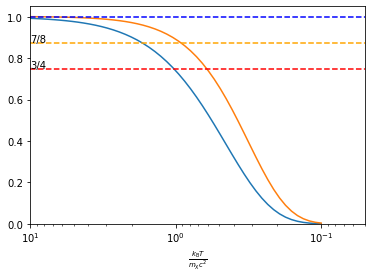

In [107]:
import pylab as pl
#import matplotlib.pyplot as plt
#plt.figure(figsize = (15,10))
ax = pl.subplot(111)

ax.plot(Temperature/boson_mass_GeV, gstar_n_boson)
#ax.plot(Temperature_fermion/fermion_mass_GeV, gstar_n_fermion)
ax.plot(Temperature/boson_mass_GeV, gstar_eps_boson)
#ax.plot(Temperature_fermion/fermion_mass_GeV, gstar_eps_fermion)
#ax.plot(Temperature/boson_mass_GeV, gstar_p_boson)
#ax.plot(Temperature_fermion/fermion_mass_GeV, gstar_p_fermion)
#ax.plot(Temperature/boson_mass_GeV, gstar_s_boson)
#ax.plot(Temperature_fermion/fermion_mass_GeV, gstar_s_fermion)



ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel(r"$\frac{k_{\rm B}T}{m_{\rm X}c^2}$")
ax.axhline(7./8., color="orange", linestyle="dashed")
ax.axhline(3./4., color="red", linestyle="dashed")
ax.axhline(1.0, color="b", linestyle="dashed")
ax.set_xlim([10, 0.05])
ax.set_ylim([0, 1.05])
ax.text(10,3/4,"3/4")
ax.text(10,7/8,"7/8")
#plt.show()

In [108]:
 gstar_n_boson = boson.effective_dof_n(124.97)       #g*(number density)/g
 print(gstar_n_boson)   

0.739577680156012


<ipython-input-105-f24fd8094315>:20: RuntimeWarning: overflow encountered in exp
  return curlyE*np.sqrt(curlyE**2-curlyM**2)/(np.exp(curlyE)-1)


In [109]:
 gstar_eps_boson = boson.effective_dof_eps(0.5*124.97)       #g*(energy density)/g
 print(gstar_eps_boson)  

0.6592595095107522


<ipython-input-105-f24fd8094315>:34: RuntimeWarning: overflow encountered in exp
  return (curlyE**2)*(np.sqrt(curlyE**2-curlyM**2)/(np.exp(curlyE)-1))
